In [1]:
#%run MChain.ipynb
import torch
import graphviz as gv
from MChain import MChain 
torch.set_printoptions(precision=2)

# construct a Markov chain

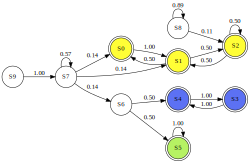

In [2]:
# building a chain using an (unnormalized) transition matrix

T10 = torch.tensor([[0,1,0,0,0,0,0,0,0,0],[1,0,1,0,0,0,0,0,0,0],
                [0,1,1,0,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0],
                [0,0,0,1,0,0,0,0,0,0],[0,0,0,0,0,1,0,0,0,0],
                [0,0,0,0,1,1,0,0,0,0],[1,1,0,0,0,0,1,4,0,0],
                [0,0,1,0,0,0,0,0,8,0],[0,0,0,0,0,0,0,1,0,0]], dtype=torch.float, requires_grad=False)

mc = MChain()
mc.from_matrix(T10, prefix='S')
mc.display(size=3.5) 

# running a chain

In [3]:
for _ in range(5):
    print(mc.run(start='S9', steps=10))

['S7', 'S7', 'S6', 'S4', 'S3', 'S4', 'S3', 'S4', 'S3', 'S4']
['S7', 'S1', 'S0', 'S1', 'S2', 'S1', 'S0', 'S1', 'S0', 'S1']
['S7', 'S1', 'S0', 'S1', 'S2', 'S1', 'S0', 'S1', 'S2', 'S1']
['S7', 'S7', 'S1', 'S0', 'S1', 'S2', 'S1', 'S2', 'S2', 'S1']
['S7', 'S7', 'S7', 'S0', 'S1', 'S0', 'S1', 'S0', 'S1', 'S2']


In [4]:
for _ in range(5):
    print(mc.run(start='S9', steps=100, stop_states=['S0'], early_stop=True))

['S7', 'S1', 'S2', 'S2', 'S1', 'S0']
['S7', 'S7', 'S7', 'S1', 'S2', 'S2', 'S1', 'S2', 'S1', 'S2', 'S1', 'S2', 'S1', 'S2', 'S1', 'S2', 'S1', 'S2', 'S2', 'S2', 'S2', 'S2', 'S1', 'S0']
['S7', 'S0']
['S7', 'S7', 'S1', 'S0']
['S7', 'S6']


In [5]:
for _ in range(5):
    print(mc.run(start='S9', steps=100, stop_classes=[1], early_stop=True))

['S7', 'S0']
['S7', 'S7', 'S0']
['S7', 'S1']
['S7', 'S7', 'S0']
['S7', 'S7', 'S7', 'S7', 'S7', 'S7', 'S6']


In [6]:
for _ in range(5):
    print(mc.run(start='S9', steps=10, stop_states=['S1'], visits= 3, early_stop=False))

['S7', 'S6', 'S4', 'S3', 'S4', 'S3', 'S4', 'S3', 'S4', 'S3']
['S7', 'S1', 'S2', 'S1', 'S0', 'S1']
['S7', 'S7', 'S7', 'S7', 'S0', 'S1', 'S0', 'S1', 'S2', 'S2']
['S7', 'S7', 'S7', 'S6', 'S4', 'S3', 'S4', 'S3', 'S4', 'S3']
['S7', 'S7', 'S1', 'S0', 'S1', 'S2', 'S1']


# compare theoretical data to experimental data 

In [7]:
mc.analyse()

In [8]:
# Hij: probability to reach a state

n = 1000
start = 'S9'
stop = 'S5'
traces = []
for _ in range(n):
    trace = mc.run(start=start, steps=100, stop_states=[stop], early_stop=True)
    traces.append(trace) 


print(mc.Hij(start,stop), float(torch.tensor([stop== trace[-1] for trace in traces]).sum()/n))

tensor(0.17) 0.16200000047683716


In [9]:
print(mc.H)

tensor([[1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00],
        [0.00, 0.00, 0.00, 0.50, 0.50, 0.50, 0.00, 0.00, 0.00, 0.00],
        [0.67, 0.67, 0.67, 0.17, 0.17, 0.17, 0.33, 0.57, 0.00, 0.00],
        [1.00, 1.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.89, 0.00],
        [0.67, 0.67, 0.67, 0.17, 0.17, 0.17, 0.33, 1.00, 0.00, 0.00]])


In [10]:
# Qi distribution of absorbing classes 

n = 10000
start = 'S9'
stop_classes = torch.unique(mc.c[mc.r])
traces = []
for _ in range(n):
    trace = mc.run(start=start, steps=100, stop_classes=stop_classes, early_stop=True)
    traces.append(trace) 

print(mc.Qi(start)) 

l = list()
for stop_class in stop_classes:
    l.append(torch.tensor([stop_class==mc.ci(trace[-1]) for trace in traces]).sum()/n)
print(l)

tensor([0.67, 0.17, 0.17])
[tensor(0.67), tensor(0.17), tensor(0.16)]


In [11]:
print(mc.Q)

tensor([[1.00, 0.00, 0.00],
        [1.00, 0.00, 0.00],
        [1.00, 0.00, 0.00],
        [0.00, 1.00, 0.00],
        [0.00, 1.00, 0.00],
        [0.00, 0.00, 1.00],
        [0.00, 0.50, 0.50],
        [0.67, 0.17, 0.17],
        [1.00, 0.00, 0.00],
        [0.67, 0.17, 0.17]])


In [12]:
#di relative time spending in state 

n = 10000
start = 'S2'
traces = []
trace = mc.run(start=start, steps=n)
trace_ids = [mc.s2i[i0] for i0 in trace]

print(mc.di(start), (torch.tensor(trace_ids)==mc.s2i[start]).sum()/n)

tensor(0.40) tensor(0.40)


# birth-death process

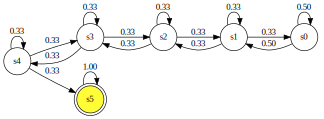

In [13]:
N = 6
U = torch.zeros(N,N)
U = torch.diagonal_scatter(U,torch.ones(N-1),offset=1)
U = torch.diagonal_scatter(U,torch.ones(N),offset=0)
U = torch.diagonal_scatter(U,torch.ones(N-1),offset=-1)
U[N-1,N-2] = 0

mc1 = MChain()
mc1.from_matrix(U)
mc1.display()
mc1.analyse()

In [14]:
# Tij expected time to visit state j 

n = 1000
start = 's1'
stop_state = 's3'
traces = []
for _ in range(n):
    trace = mc1.run(start=start, steps=1000, stop_states=[stop_state], early_stop=True)
    trace_ids = [mc1.s2i[i0] for i0 in trace]
    traces.append(trace_ids) 

print(mc1.Tij(start, stop_state), torch.tensor([len(trace) for trace in traces if trace[-1]==mc1.s2i[stop_state]]).float().mean())

tensor(13.00) tensor(12.63)


In [15]:
print(mc1.T)

tensor([[-1.00,  2.00,  7.00, 15.00, 26.00, 40.00],
        [-1.00, -1.00,  5.00, 13.00, 24.00, 38.00],
        [-1.00, -1.00, -1.00,  8.00, 19.00, 33.00],
        [-1.00, -1.00, -1.00, -1.00, 11.00, 25.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00, 14.00],
        [-1.00, -1.00, -1.00, -1.00, -1.00,  1.00]])


In [16]:
# Vij expected visits to state j 

n = 1000
start = 's0'
stop_state = 's5'
visit_state = 's3'
traces = []
for _ in range(n):
    trace = mc1.run(start=start, steps=1000, stop_states=[stop_state], early_stop=True)
    trace_ids = [mc1.s2i[i0] for i0 in trace]
    traces.append(trace_ids)
    
counts = [(torch.tensor(trace)==mc1.s2i[visit_state]).sum() for trace in traces if trace[-1]==mc1.s2i[stop_state]]

print(mc1.Vij(start, visit_state), torch.tensor(counts).float().mean())

tensor(6.00) tensor(5.78)


In [17]:
print(mc1.V)

tensor([[ 9.00, 12.00,  9.00,  6.00,  3.00, -1.00],
        [ 8.00, 11.00,  9.00,  6.00,  3.00, -1.00],
        [ 6.00,  9.00,  8.00,  6.00,  3.00, -1.00],
        [ 4.00,  6.00,  6.00,  5.00,  3.00, -1.00],
        [ 2.00,  3.00,  3.00,  3.00,  2.00, -1.00],
        [ 0.00,  0.00,  0.00,  0.00,  0.00, -1.00]])
